In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [36]:
dataset = pd.read_csv("50_Startups.csv")
dataset.head()
# dataset['State'].unique()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :-1])
X[:, :-1] = imputer.transform(X[:, :-1])

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
# joblib.dump(regressor, 'linear_regression_model.pkl')
f"w: {regressor.coef_[0]}, b: {regressor.intercept_}"

'w: 86.63836917786998, b: 42467.529248548584'

In [42]:
y_hat = regressor.predict(X_test)
y_hat

array([103015.20159797, 132582.27760814, 132447.73845173,  71976.09851258,
       178537.48221053, 116161.24230166,  67851.69209677,  98791.73374689,
       113969.43533012, 167921.06569548])

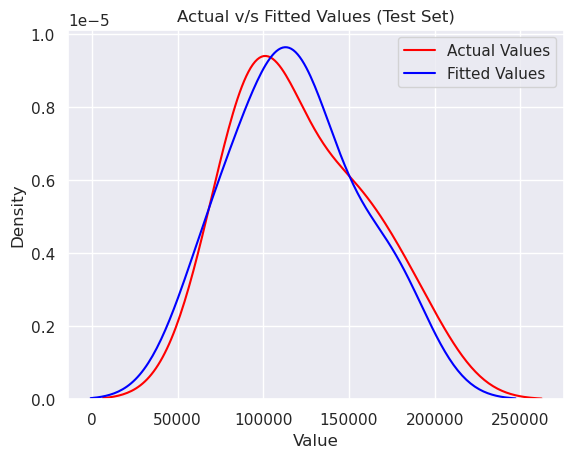

In [43]:
sns.set_theme(style="darkgrid")
sns.kdeplot(y_test, color="red", label="Actual Values")
sns.kdeplot(y_hat, color="blue", label="Fitted Values")

plt.title("Actual v/s Fitted Values (Test Set)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()